<a href="https://colab.research.google.com/github/lfastino0306/MVPAn-lise-de-Dados-e-Boas-Pr-ticas/blob/main/ProjetoMVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP: Análise de Adesão do Cliente a Campanhas Bancárias**

**Sprint I: Análise de Dados e Boas Práticas**

**Autor: Leonardo Faustino de Souza Ribeiro**

**Escopo**: O projeto visa explorar e analisar a base de dados de um banco para compreender a adesão dos clientes a campanhas de marketing. Através da aplicação de técnicas de análise de dados, pretende-se identificar padrões, perfis de clientes mais propensos a aderir e fatores que influenciam positivamente ou negativamente na participação em campanhas específicas. O objetivo final é fornecer insights estratégicos que auxiliem na otimização das futuras campanhas de marketing, aumentando a efetividade e a satisfação do cliente.

Os dados referem-se a campanhas de marketing direto realizadas por uma instituição bancária portuguesa, as quais foram conduzidas por meio de chamadas telefônicas. Foi frequentemente necessário mais de um contato com o mesmo cliente para determinar se o produto (depósito a prazo bancário) seria subscrito ('sim') ou não ('não').

O MVP inicialmente realizará uma análise descritiva e diagnóstica dos dados, oferecendo uma visão analítica abrangente das campanhas realizadas pelo banco em questão.

**Premissas:**
O MVP em sua primeira versão fará a análise descritiva e estáticas dos dados, portanto, não será aplicado nenhuma técnica de ML para classificação ou predição;

A análise tem objetivo acadêmico, portanto, seus resultados podem divergir de outras avaliações;

A analises serão feitas para períodos contínuos de medição e conjuntos ativos na data de coleta dos dados;

Serão considerados os dados de medição atuais para um dados conjunto de medição;

**Restrições e Condições:**
Nessa fase será utilizado os dados coletado de um banco X.

**Análise Exploratória dos Dados**

**Início do Código PY para tratar a base de dado lida**

As bases de dados podem ser obtidas no link indicado, podendo ser obtidas em vários formatos: Optamos em fazer os downloads dos arquivos:


Base de dados:
https://archive.ics.uci.edu/dataset/222/bank+marketing


A sequencia de código são executadas as seguintes ações:

Carga das bibliotecas Pandas e Numpy para uso no tratamento dos dados;
Leitura dos arquivos csv e verificação do tamanho e primeiras linhas do arquivo de indicadores coletivos de continuidade. O arquivo de limites deverá ser inspecionado mais a frente no código.

**Dataset**

O Dataset a ser utilizado é formado pelos seguintes arquivos e atributos:

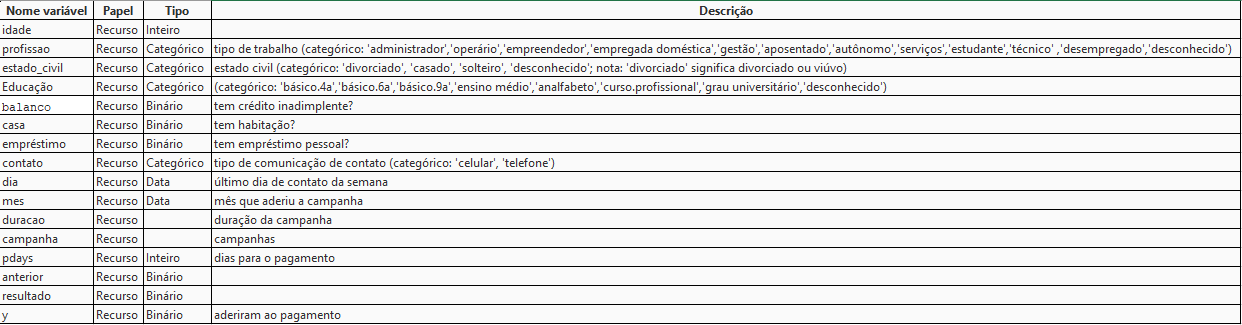

In [41]:
# Carregando as Bibliotecas
import pandas as pd
import numpy as np


# Lendo o arquivo Indicadores de continuidade coletivo – 2020 a 2023
url='https://raw.githubusercontent.com/lfastino0306/MVPAn-lise-de-Dados-e-Boas-Pr-ticas/main/bank-full.csv'
base_banco = pd.read_csv(url)

# Verificando a quantidade de registros do arquivo
linhas, colunas = base_banco.shape
print('Quantidade de linhas do dataframe de Indicadores de continuidade:',"{:,}".format(linhas).replace(",", "."))
print('Quantidade de colunas do dataframe de Indicadores de continuidade:',colunas)

# Visão das primeiras linhas
base_banco.head(100)


Quantidade de linhas do dataframe de Indicadores de continuidade: 45.211
Quantidade de colunas do dataframe de Indicadores de continuidade: 17


,idade,profissao,estado_civil,educacao,default,balanco,casa,emprestimo,contato,dia,mes,duracao,campanha,pdays,anterior,resultado,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


**Tirando os dados Nulos, Zeros e normalização de strings**

**Ações executadas:**

1 -Inspeção do arquivo (head e tail);

2 - Verificação do tamanho do arquivo;

3 - Sumarizar por atributo o número de registros nulos.

4 - Mostrar sumarização após o drop das instâncias nulas;

5 - Normalizar os atributos, removendo diactricts e ativado upcase, para evitar que erros de escrita de um memos significado semãntico possam gerar resultados errados em agregações e exibições.

In [42]:
# Exibindo as últimas linhas do dataframe de limites dos indicadores
base_banco.head()

,idade,profissao,estado_civil,educacao,default,balanco,casa,emprestimo,contato,dia,mes,duracao,campanha,pdays,anterior,resultado,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
# Exibindo as últimas linhas do dataframe de limites dos indicadores
base_banco.tail()

,idade,profissao,estado_civil,educacao,default,balanco,casa,emprestimo,contato,dia,mes,duracao,campanha,pdays,anterior,resultado,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [44]:
# Verificando a quantidade de registros do dataframe
print('Tamanho do arquivo:',"{:,}".format(base_banco.size).replace(",", "."))

Tamanho do arquivo: 768.587


In [45]:
# Verificando se tenho valores Nulos no dataframe
print(base_banco.isnull().sum())

idade           0
profissao       0
estado_civil    0
educacao        0
default         0
balanco         0
casa            0
emprestimo      0
contato         0
dia             0
mes             0
duracao         0
campanha        0
pdays           0
anterior        0
resultado       0
y               0
dtype: int64


In [46]:
# Elimine as linhas com valores nulos
base_banco = base_banco.dropna()

In [47]:
import re

# Aplica a função lambda para remover caracteres especiais
base_banco[['profissao', 'estado_civil', 'educacao', 'default','mes', 'casa',
            'emprestimo', 'contato', 'resultado', 'y']] = base_banco[
                ['profissao', 'estado_civil', 'educacao', 'default', 'mes', 'casa',
            'emprestimo', 'contato', 'resultado', 'y']].applymap(lambda x: re.sub('[^A-Za-z0-9]+', '', x))

# Converte as colunas para letras maiúsculas
base_banco[['profissao', 'estado_civil', 'educacao', 'default', 'mes', 'casa',
            'emprestimo', 'contato', 'resultado', 'y']] = base_banco[
    ['profissao', 'estado_civil', 'educacao', 'default', 'mes', 'casa',
            'emprestimo', 'contato', 'resultado', 'y']].apply(lambda x: x.str.upper())

base_banco.head(100)

,idade,profissao,estado_civil,educacao,default,balanco,casa,emprestimo,contato,dia,mes,duracao,campanha,pdays,anterior,resultado,y
0,58,MANAGEMENT,MARRIED,TERTIARY,NO,2143,YES,NO,UNKNOWN,5,MAY,261,1,-1,0,UNKNOWN,NO
1,44,TECHNICIAN,SINGLE,SECONDARY,NO,29,YES,NO,UNKNOWN,5,MAY,151,1,-1,0,UNKNOWN,NO
2,33,ENTREPRENEUR,MARRIED,SECONDARY,NO,2,YES,YES,UNKNOWN,5,MAY,76,1,-1,0,UNKNOWN,NO
3,47,BLUECOLLAR,MARRIED,UNKNOWN,NO,1506,YES,NO,UNKNOWN,5,MAY,92,1,-1,0,UNKNOWN,NO
4,33,UNKNOWN,SINGLE,UNKNOWN,NO,1,NO,NO,UNKNOWN,5,MAY,198,1,-1,0,UNKNOWN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,MANAGEMENT,MARRIED,TERTIARY,NO,101,YES,YES,UNKNOWN,5,MAY,426,1,-1,0,UNKNOWN,NO
96,55,BLUECOLLAR,MARRIED,SECONDARY,NO,383,NO,NO,UNKNOWN,5,MAY,287,1,-1,0,UNKNOWN,NO
97,60,RETIRED,MARRIED,TERTIARY,NO,81,YES,NO,UNKNOWN,5,MAY,101,1,-1,0,UNKNOWN,NO
98,39,TECHNICIAN,MARRIED,SECONDARY,NO,0,YES,NO,UNKNOWN,5,MAY,203,1,-1,0,UNKNOWN,NO


In [48]:
# Verificando os tipos de coluna do dataframe Limite dos Indicadores
base_banco.dtypes

idade            int64
profissao       object
estado_civil    object
educacao        object
default         object
balanco          int64
casa            object
emprestimo      object
contato         object
dia              int64
mes             object
duracao          int64
campanha         int64
pdays            int64
anterior         int64
resultado       object
y               object
dtype: object

**Analise descritiva dos dados**

Os trechos de código abaixo possibilitam avaliar como os dados se manifestam no contexto da análise de dados de campanhas bancárias. A análise proporcionará insights sobre o comportamento dos dados por meio de visualizações específicas de agrupamentos, operando sobre os valores registrados e enviados pelos participantes da campanha. Diversos tipos de agrupamentos serão explorados para compreender as dinâmicas contidas.

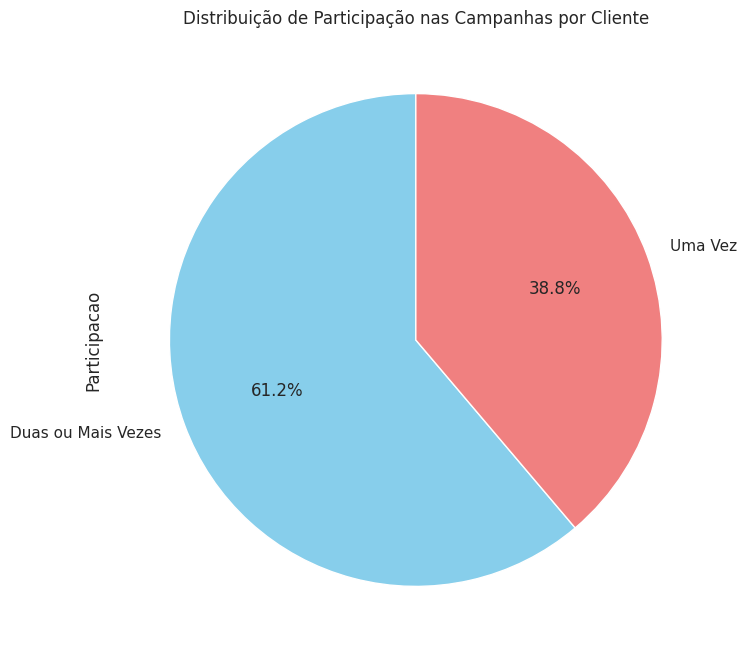

Clientes que participaram apenas uma vez: 17544
Clientes que participaram duas ou mais vezes: 27667


In [49]:
# Importando a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Contagem de participação em campanhas por pessoa
contagem_participacao = base_banco['campanha'].value_counts()

# Crie uma nova coluna indicando se o cliente participou uma ou mais vezes
base_banco['Participacao'] = base_banco['campanha'].map(contagem_participacao)
base_banco['Participacao'] = base_banco['campanha'].apply(lambda x: 'Uma Vez' if x == 1 else 'Duas ou Mais Vezes')

# Contagem de participação por categoria
contagem_categorias = base_banco['Participacao'].value_counts()

# Crie um gráfico de pizza
plt.figure(figsize=(8, 8))
contagem_categorias.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Adicione título
plt.title('Distribuição de Participação nas Campanhas por Cliente')

# Exiba o gráfico
plt.show()

# Imprima a quantidade de pessoas que participaram de uma ou mais campanhas
quantidade_pessoas_duas_ou_mais_campanhas = contagem_categorias['Duas ou Mais Vezes']
quantidade_pessoas_uma_vez = contagem_categorias['Uma Vez']

print(f"Clientes que participaram apenas uma vez: {quantidade_pessoas_uma_vez}")
print(f"Clientes que participaram duas ou mais vezes: {quantidade_pessoas_duas_ou_mais_campanhas}")

A análise do gráfico revela padrões importantes na participação dos clientes nas campanhas bancárias. O gráfico de pizza destaca duas categorias distintas de clientes:

Clientes que Participaram Duas ou Mais Vezes (61.2%):

A maioria significativa dos clientes, representando 61.2%, participou ativamente em duas ou mais campanhas. Isso pode indicar um engajamento consistente por parte desse grupo, sugerindo que esses clientes estão mais propensos a responder positivamente às campanhas sucessivas. Clientes que Participaram Apenas Uma Vez (38.8%):

Cerca de 38.8% dos clientes participaram apenas uma vez nas campanhas. Essa parcela pode incluir clientes que talvez não tenham sido tão receptivos ou envolvidos em participações repetidas. Pode haver oportunidades para estratégias de retenção ou abordagens específicas para incentivar maior envolvimento desses clientes.

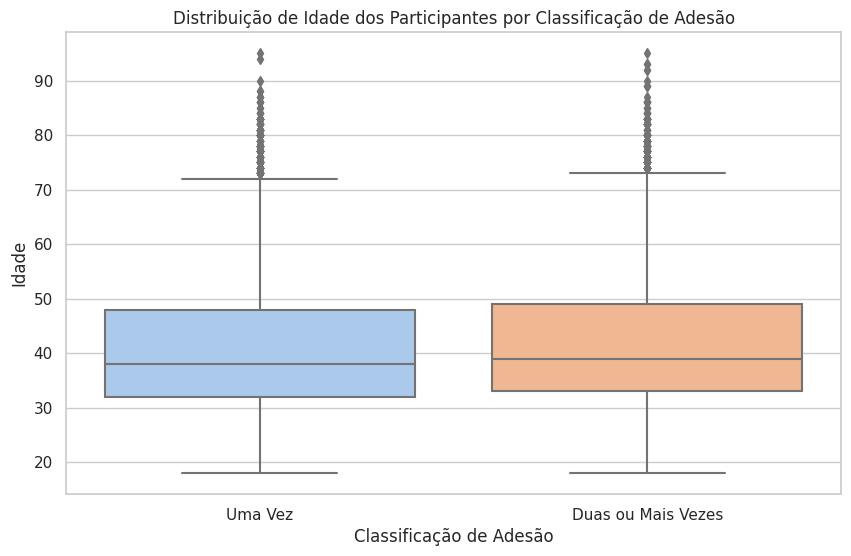

In [50]:
import seaborn as sns

# Contagem de participação em campanhas por pessoa
contagem_participacao = base_banco['campanha'].value_counts()

# Crie uma nova coluna indicando se o cliente participou uma ou mais vezes
base_banco['Participacao'] = base_banco['campanha'].map(contagem_participacao)
base_banco['Participacao'] = base_banco['campanha'].apply(lambda x: 'Uma Vez' if x == 1 else 'Duas ou Mais Vezes')

# Configure o estilo do seaborn para melhorar a estética do gráfico
sns.set(style="whitegrid")

# Crie um gráfico de caixa (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Participacao', y='idade', data=base_banco, palette='pastel')

# Adicione título e rótulos aos eixos
plt.title('Distribuição de Idade dos Participantes por Classificação de Adesão')
plt.xlabel('Classificação de Adesão')
plt.ylabel('Idade')

# Exiba o gráfico
plt.show()

A análise da distribuição de idade dos participantes em relação à classificação de adesão revela padrões significativos. O gráfico de caixa (boxplot) permite uma compreensão mais detalhada da faixa etária dos clientes que participaram das campanhas bancárias, considerando a distinção entre aqueles que aderiram apenas uma vez e aqueles que participaram duas ou mais vezes.

**1 -Clientes que Participaram Apenas Uma Vez:**

A faixa etária predominante dos clientes que participaram uma vez está concentrada entre 30 e 50 anos. Especificamente, observa-se uma tendência maior na faixa mais jovem, incluindo clientes em torno dos 30 anos.

**2 - Clientes que Participaram Duas ou Mais Vezes:**

Os clientes que participaram duas ou mais vezes também apresentam uma faixa etária entre 30 e 50 anos. No entanto, há uma notável inclinação para a faixa etária mais avançada, com uma tendência mais pronunciada em torno dos 50 anos.

**Implicações e Insights:**

Ambos os grupos têm uma presença significativa na faixa etária de 30 a 50 anos, sugerindo que esta faixa etária é mais propensa a participar das campanhas bancárias. A concentração mais expressiva de clientes acima de 50 anos entre aqueles que participaram duas ou mais vezes sugere uma fidelização ou engajamento contínuo nessa faixa etária mais madura. Estratégias de marketing e campanhas futuras podem ser adaptadas para melhor atender às preferências e comportamentos específicos de cada faixa etária, considerando a possível necessidade de abordagens diferenciadas para atrair e manter a participação desses grupos distintos. Em resumo, a análise da faixa etária dos participantes em relação à adesão às campanhas fornece insights valiosos para aprimorar a segmentação e personalização de estratégias de marketing, maximizando o envolvimento e a fidelização dos clientes em diferentes faixas etárias.

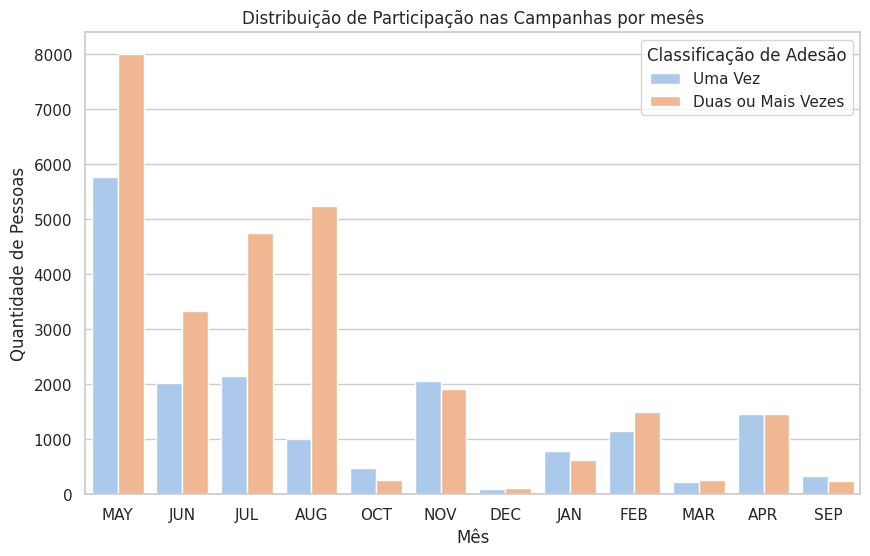

In [51]:
# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='mes', hue='Participacao', data=base_banco, palette='pastel')

# Adicione título e rótulos aos eixos
plt.title('Distribuição de Participação nas Campanhas por mesês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pessoas')

# Exiba a legenda
plt.legend(title='Classificação de Adesão', loc='upper right')

# Exiba o gráfico
plt.show()

**Análise da Participação nas Campanhas por Mês:**

O gráfico acima apresenta a distribuição da quantidade de pessoas que aderiram às campanhas nos meses de maio, agosto e junho. As barras estão organizadas em ordem de prioridade, considerando maio como o primeiro lugar, agosto como o segundo e junho como o terceiro.

Maio (Primeiro Lugar):

O mês de maio lidera em termos de participação nas campanhas, registrando a maior quantidade de adesões. Essa predominância pode sugerir que as estratégias de marketing ou eventos específicos realizados em maio foram particularmente eficazes em atrair participantes.

Agosto (Segundo Lugar):

Agosto ocupa a segunda posição em termos de participação, apresentando uma quantidade significativa de adesões. Isso pode indicar a continuidade do envolvimento dos clientes, possivelmente impulsionado por campanhas específicas ou benefícios oferecidos durante esse mês.

Julho (Terceiro Lugar):

Julho, embora em terceiro lugar, ainda contribuiu com uma quantidade apreciável de participantes. Pode haver oportunidades para explorar estratégias que aumentem a adesão em julho, considerando seu potencial de crescimento.

**Implicações e Estratégias Sugeridas**:

Reforçar as campanhas em maio, aproveitando o sucesso observado neste mês e otimizando as estratégias que demonstraram eficácia. Investigar as razões por trás do destaque em agosto para entender os fatores que contribuíram para o aumento da adesão. Desenvolver iniciativas específicas para potencializar a participação em julho, identificando possíveis áreas de melhoria ou implementação de incentivos adicionais. Essa análise por mês oferece insights valiosos para aprimorar o planejamento estratégico das campanhas, destacando períodos de maior e menor participação. Ao compreender as tendências mensais, a instituição bancária pode ajustar suas abordagens para maximizar o impacto e a eficácia de suas iniciativas de marketing ao longo do ano.

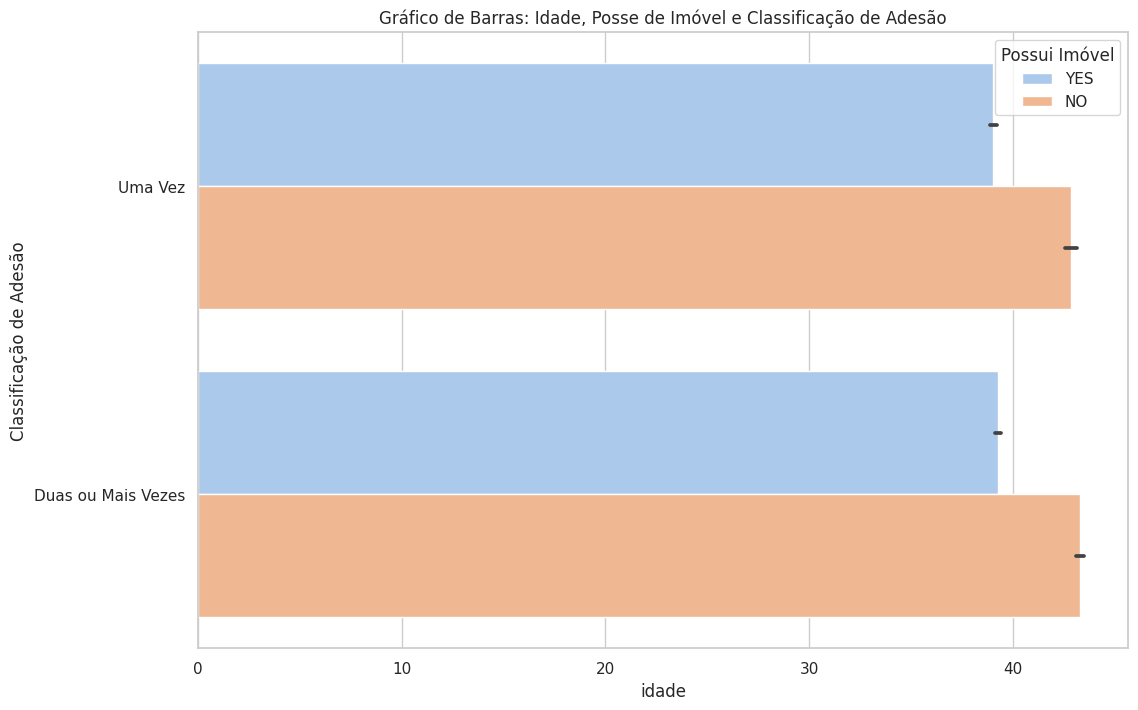

In [52]:
# Crie um gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=base_banco, x='idade', y='Participacao', hue='casa', palette='pastel')

# Adicione título e rótulos aos eixos
plt.title('Gráfico de Barras: Idade, Posse de Imóvel e Classificação de Adesão')
plt.xlabel('idade')
plt.ylabel('Classificação de Adesão')

# Exiba a legenda
plt.legend(title='Possui Imóvel')

# Exiba o gráfico
plt.show()

A análise dos gráficos de barras revela um padrão interessante em relação às pessoas que aderiram mais de uma vez e possuíam imóveis. Em ambas as situações, a presença significativa desses participantes é notável na faixa etária em torno de 40 anos.

**Pessoas que Aderiram Mais de Uma Vez:**

Para aqueles que participaram duas ou mais vezes nas campanhas, a concentração é notável na faixa etária de aproximadamente 40 anos. Isso sugere que indivíduos nessa faixa etária têm uma propensão maior a engajamento contínuo, participando ativamente em múltiplas campanhas.

**Pessoas que Aderiram Mais de Uma Vez e Possuíam Imóveis:**

Dentro do grupo que aderiu mais de uma vez e possui imóveis, a tendência de idade ao redor dos 40 anos é ainda mais proeminente. Este subconjunto específico destaca a importância dessa faixa etária não apenas na participação recorrente, mas também na posse de imóveis, indicando possíveis correlações entre esses fatores.

**Implicações e Estratégias Sugeridas:**

O foco em estratégias de retenção e engajamento pode ser direcionado especificamente para a faixa etária em torno de 40 anos, considerando seu histórico de participação ativa. Campanhas personalizadas que atendam às necessidades e interesses específicos desse grupo demográfico podem ser mais eficazes na maximização do envolvimento. Explorar a criação de benefícios ou incentivos direcionados aos proprietários de imóveis nessa faixa etária, aproveitando a associação positiva observada. Essa análise proporciona insights valiosos para refinar estratégias de marketing, destacando a importância da faixa etária de 40 anos na participação recorrente e na posse de imóveis. Ao compreender esses padrões, a instituição bancária pode ajustar suas abordagens para melhor atender às necessidades desse grupo específico, otimizando assim o impacto de suas campanhas.

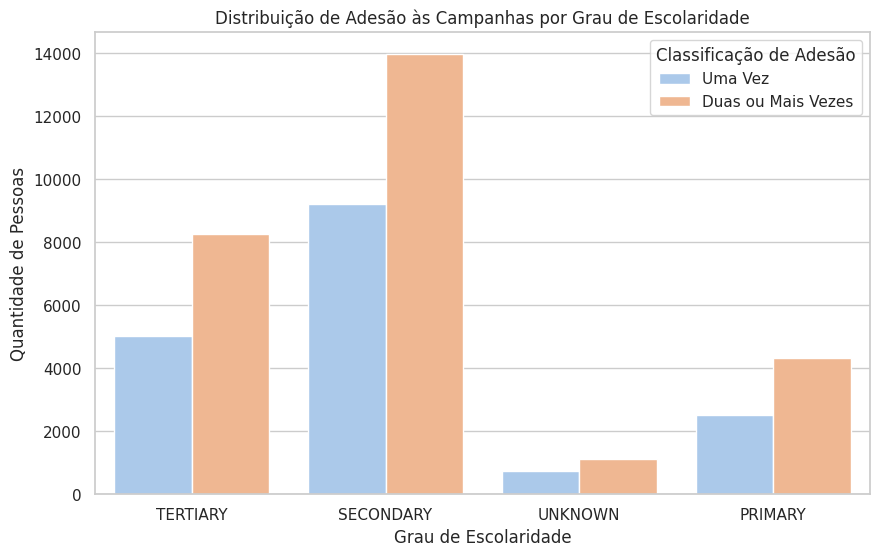

In [53]:
# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=base_banco, x='educacao', hue='Participacao', palette='pastel')

# Adicione título e rótulos aos eixos
plt.title('Distribuição de Adesão às Campanhas por Grau de Escolaridade')
plt.xlabel('Grau de Escolaridade')
plt.ylabel('Quantidade de Pessoas')

# Exiba a legenda
plt.legend(title='Classificação de Adesão', loc='upper right')

# Exiba o gráfico
plt.show()

A análise do gráfico de barras revela um padrão interessante na relação entre o grau de escolaridade e a adesão às campanhas. Notavelmente, as pessoas com ensino médio apresentam a maior taxa de adesão a campanhas mais de uma vez. Aqui estão algumas considerações:

**Ensino Médio e Adesão Recorrente:**

O gráfico destaca que os indivíduos com ensino médio têm a maior proporção de participação em campanhas mais de uma vez. Isso pode sugerir que estratégias específicas de engajamento ou abordagens de marketing direcionadas a esse grupo educacional foram particularmente eficazes.

**Estratégias Direcionadas para o Ensino Médio:**

A instituição bancária pode considerar desenvolver estratégias de campanha personalizadas para atrair e manter a atenção dos indivíduos com ensino médio. Investigar os fatores que contribuíram para o sucesso entre esse grupo, adaptando e expandindo essas estratégias para outros segmentos, pode ser uma abordagem valiosa.

**Diversificação de Abordagens:**

Embora o ensino médio se destaque, é essencial não negligenciar outros grupos educacionais. A diversificação das abordagens de marketing para atender às diferentes necessidades e características de cada grupo pode ser uma estratégia eficaz para otimizar a adesão global.

**Avaliação Contínua:**

Monitorar continuamente a resposta às campanhas em diferentes segmentos educacionais é fundamental. A análise periódica permitirá ajustes estratégicos com base em mudanças nas preferências e comportamentos do público. Em suma, a instituição bancária pode se beneficiar ao reconhecer a alta taxa de adesão recorrente entre aqueles com ensino médio. Ao compreender as nuances desse grupo específico, podem ser desenvolvidas estratégias mais direcionadas e eficazes para maximizar o engajamento e o sucesso das campanhas. No entanto, é crucial manter uma abordagem equilibrada e adaptável para atender às diversas características educacionais de sua base de clientes.

**Conclusão da Análise de Marketing de Clientes em Campanhas Bancárias:**

Ao explorar profundamente os dados relacionados às campanhas de marketing de um banco, diversas insights foram identificadas, oferecendo uma visão abrangente do comportamento dos clientes em relação às adesões. Vamos resumir as principais conclusões derivadas das análises realizadas:

Idade como Fator de Influência:

A faixa etária em torno dos 40 anos emergiu como um ponto focal, indicando uma propensão significativa para a adesão contínua às campanhas.

**Mês como Determinante da Participação:**

Os meses de maio, agosto e junho destacaram-se como períodos-chave para engajamento, com maio liderando em participação. Esses insights proporcionam oportunidades estratégicas para otimizar campanhas específicas nessas épocas.

**Educação Impactando a Adesão:**

A análise do grau de escolaridade revelou que indivíduos com ensino médio apresentam a maior taxa de adesão recorrente. Estratégias personalizadas para esse grupo podem ser fundamentais para o sucesso das campanhas.

**Posse de Imóveis e Participação Recorrente:**

A posse de imóveis, especialmente entre aqueles que aderiram mais de uma vez, concentra-se notavelmente em torno dos 40 anos. Isso destaca a importância de considerar não apenas a adesão, mas também as características demográficas dos participantes.

**Recomendações Estratégicas:**

Desenvolver estratégias personalizadas para a faixa etária de 40 anos, considerando as nuances de posse de imóveis e níveis educacionais. Fortalecer campanhas durante os meses de maio, agosto e junho, aproveitando as tendências de participação observadas nesses períodos. Avaliação Contínua e Adaptação:

Monitorar continuamente o desempenho das campanhas, ajustando as estratégias conforme as mudanças nas preferências e comportamentos dos clientes.

Essas conclusões oferecem um roteiro estratégico valioso para a instituição bancária otimizar suas futuras campanhas de marketing. A compreensão mais profunda dos padrões de comportamento dos clientes proporciona uma base sólida para a tomada de decisões informadas e eficazes, impulsionando o sucesso e a eficácia das iniciativas de marketing. É crucial que a instituição bancária adote uma abordagem ágil e adaptável, alinhando continuamente suas estratégias com as dinâmicas em evolução do mercado e das preferências dos clientes.